# Exploring income data and census blocks in Oakland, California

### Description

In this assignment, I will be exploring median household income data for census blocks across Oakland, California, a mid-sized city in the East Bay Area. The data comes from the 2015-2019 American Community Survey (ACS) 5-year estimates. This will be directly relevant to our ultimate project, which will use both racial demographic data as well as income data to examine inequities in the distribution of trees in Oakland.

### Author

Michael Rosen

## Setting The Scene

To start my project, I will import a few libraries to aid in my exploration and visualization of the data.

In [40]:
import geopandas as gpd

In [41]:
import pandas as pd

In [42]:
import contextily as ctx

In [43]:
import matplotlib.pyplot as plt

Now that all of my libraries are in place, I will import my dataset: Table B19013 from the 2015-2019 American Community Survey (ACS) 5-year estimates for census blocks in Oakland, California, better known as the median household income table.

In [44]:
oakdata=gpd.read_file('oakdata.geojson')

## Exploring

Now that the libraries and data are loaded into my notebook, it's time to make sure everything's looking good with my data. I'll start with a few commands that give me a sense of what I'm working with.

In [45]:
oakdata.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,17887.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,23842.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,63106.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,79006.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,36064.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [46]:
oakdata.sample(10)

,geoid,name,B19013001,"B19013001, Error",geometry
172,15000US060014061004,"Block Group 4, Alameda, CA",44904.0,16186.0,"MULTIPOLYGON (((-122.23872 37.78359, -122.2386..."
130,15000US060014051002,"Block Group 2, Alameda, CA",250001.0,NaN,"MULTIPOLYGON (((-122.23557 37.80945, -122.2350..."
185,15000US060014064002,"Block Group 2, Alameda, CA",72917.0,27560.0,"MULTIPOLYGON (((-122.22664 37.79365, -122.2266..."
176,15000US060014062014,"Block Group 4, Alameda, CA",46563.0,14873.0,"MULTIPOLYGON (((-122.23590 37.78341, -122.2351..."
80,15000US060014036001,"Block Group 1, Alameda, CA",75514.0,11937.0,"MULTIPOLYGON (((-122.25403 37.81874, -122.2538..."
224,15000US060014073002,"Block Group 2, Alameda, CA",68783.0,15153.0,"MULTIPOLYGON (((-122.22490 37.76456, -122.2245..."
295,15000US060014093004,"Block Group 4, Alameda, CA",52969.0,31420.0,"MULTIPOLYGON (((-122.17730 37.73403, -122.1765..."
86,15000US060014037022,"Block Group 2, Alameda, CA",100500.0,34935.0,"MULTIPOLYGON (((-122.25634 37.80854, -122.2563..."
55,15000US060014022003,"Block Group 3, Alameda, CA",142500.0,99364.0,"MULTIPOLYGON (((-122.30487 37.80790, -122.3045..."
248,15000US060014081001,"Block Group 1, Alameda, CA",99671.0,31051.0,"MULTIPOLYGON (((-122.17582 37.79481, -122.1752..."


In [47]:
oakdata.shape

(338, 5)

In [48]:
oakdata.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
333,15000US060019819001,"Block Group 1, Alameda, CA",171563.0,90615.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
334,15000US060019820001,"Block Group 1, Alameda, CA",128750.0,50357.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
335,15000US060019832001,"Block Group 1, Alameda, CA",165909.0,19991.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
336,15000US060019900000,"Block Group 0, Alameda, CA",NaN,NaN,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
337,16000US0653000,"Oakland, CA",73692.0,1555.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507..."


Uh oh! Something in that tail command looks off. The last row (337) contains the name of the city instead of a block group. My suspicion is that a city-wide polygon will override any efforts to map the blocks, so I'm going to go ahead and create a new dataframe without that last row.

## Filtering

To start my filtering process, I'm going to create that modified dataframe sans the city-wide row.

In [49]:
oakdata=oakdata=oakdata.drop([337])

In [50]:
oakdata.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
332,15000US060014105001,"Block Group 1, Alameda, CA",31151.0,8384.0,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935..."
333,15000US060019819001,"Block Group 1, Alameda, CA",171563.0,90615.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
334,15000US060019820001,"Block Group 1, Alameda, CA",128750.0,50357.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
335,15000US060019832001,"Block Group 1, Alameda, CA",165909.0,19991.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
336,15000US060019900000,"Block Group 0, Alameda, CA",NaN,NaN,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."


Aha! Looks better. Now to rename these columns...

In [51]:
oakdata.columns = ['geoid',
                   'name',
                   'Median Income',
                   'Margin Of Error',
                   'geometry']

In [52]:
oakdata.head()

,geoid,name,Median Income,Margin Of Error,geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,17887.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,23842.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,63106.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,79006.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,36064.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Beautiful! I think it's time to visualize this data.

## Charts and Maps

First, let's take a look at a basic histogram to see how median household income is distributed across census blocks.

<AxesSubplot:ylabel='Frequency'>

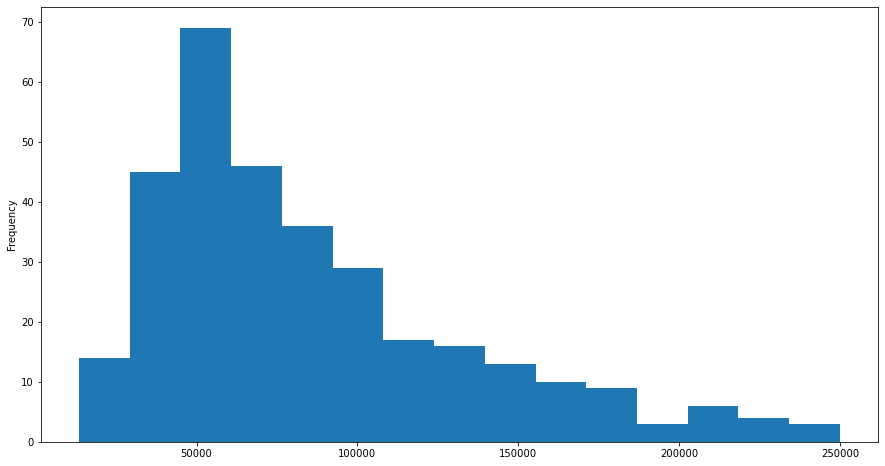

In [53]:
oakdata['Median Income'].plot.hist(figsize=(15,8),bins=15)

Interesting! Because it's an income dataset, I did expect a positive skew, but I'm not sure I expected it to be this dramatic. Clearly, there is significant economic inequality among the census blocks of Oakland.

To see how this inequality breaks down geographically, I'll create a map.

<AxesSubplot:>

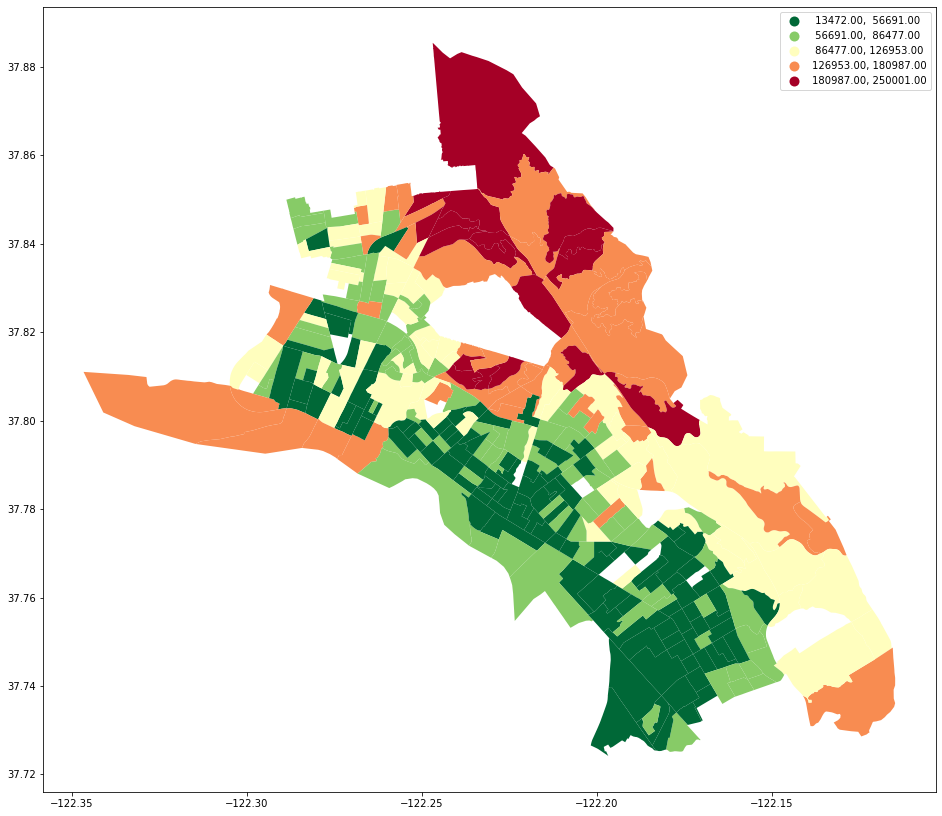

In [54]:
oakdata.plot(figsize=(16,16),
            column='Median Income',
            legend=True,
            cmap='RdYlGn_r',
            scheme='Natural_breaks')

We can see here that the poorest neighborhoods are clustered in East Oakland and West Oakland, while North Oakland and the hills contain the high-income neighborhoods.

To further drill down on the location of the wealthiest neighborhoods, I'm going to create a map with each census block with a median household income over 200,000 dollars laid on top of a basemap of Oakland. 

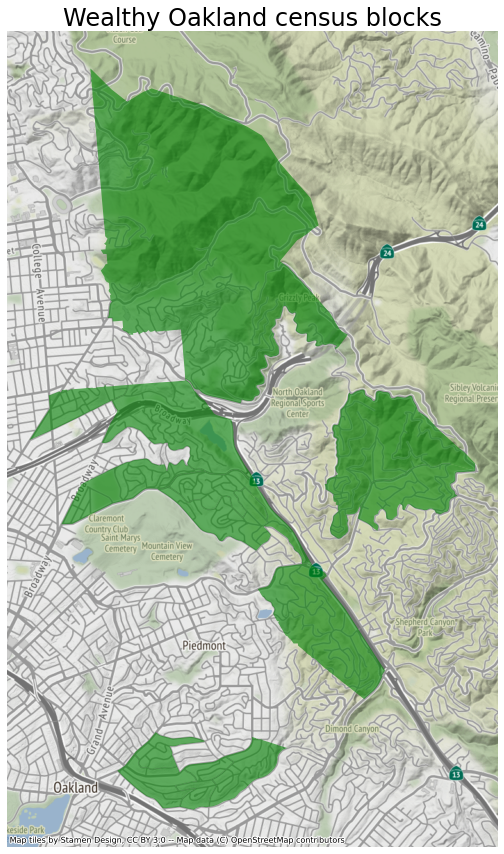

In [55]:

oakdata_web_mercator=oakdata.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15)) 
oakdata_web_mercator[oakdata_web_mercator['Median Income'] > 200000].plot(
                                                               ax=ax, 
                                                               color="green",
                                                               alpha=0.6
)
ax.axis('off')
ax.set_title('Wealthy Oakland census blocks',fontsize=24)

# add a basemap
ctx.add_basemap(ax)

Let's see how neighborhoods with less than 50,000 dollars in median household income break down.

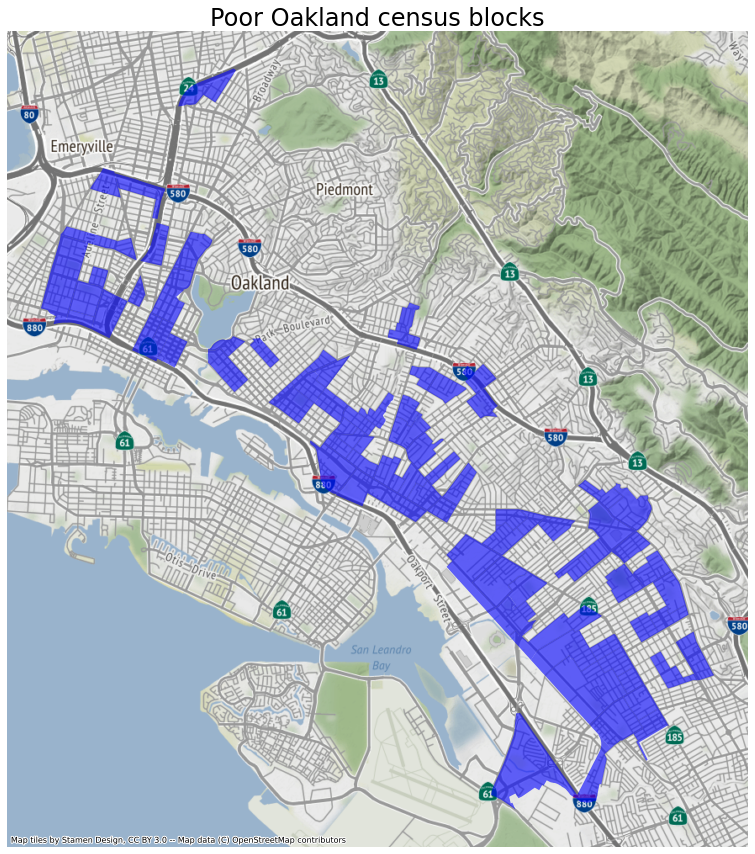

In [56]:
fig, ax = plt.subplots(figsize=(15, 15)) 
oakdata_web_mercator[oakdata_web_mercator['Median Income'] < 50000].plot(
                                                               ax=ax, 
                                                               color="blue",
                                                               alpha=0.6
)
ax.axis('off')
ax.set_title('Poor Oakland census blocks',fontsize=24)

# add a basemap
ctx.add_basemap(ax)

These maps show the stark differences in the geographical distribution of income in Oakland. Poverty clusters in the flatlands, and wealth in the hillier parts of the city. As we proceed in our analysis, I believe that we will find that street tree density will follow a similar pattern: few trees in the flatlands, many trees in the wealthy neighborhoods. But that's an exploration for another day!